# 第六次实验实验报告
计算机系 计15 2021010803 郭高旭

## 实验目的
- 练习非线性方程的计算
- 掌握使用python求非线性方程和方程组
- 通过实例使用非线性方程和方程组模型解决简化的实际问题

In [77]:
import numpy as np
from scipy.optimize import root,root_scalar
import sympy as sp
from sympy import symbols,atan
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

## 第3题：还房贷

### 问题分析与算法设计

根据生活常识贷款利率公式如下
$$
\frac{M \times r \times (1+r)^n}{(1+r)^n-1} = P\tag{1}
$$
变形得到
$$
f(r) = \frac{M \times r \times (1+r)^n}{(1+r)^n-1} - P = 0\tag{2}
$$

其中M为货款本金, r为月利率, n为还款月数, P为每月还款额
将题目中数据代入,由(2)式容易求出第1,2问的月利率
### 代码实现与结果


In [78]:
M,r,n,P=sp.symbols('M r n P')

expr=(M*r*(1+r)**n)/((1+r)**n-1)-P

datas={M:15,n:15*12,P:0.1}

f1=sp.lambdify(r,expr.subs(datas))

sol=root_scalar(f1,bracket=[0.001,1])

sol

      converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 0.002081163889459782

In [79]:
f2=sp.lambdify(r,expr.subs({M:50,n:15*12,P:0.45}))
f3=sp.lambdify(r,expr.subs({M:50,n:20,P:4.5}))

sol2=root_scalar(f2,bracket=[0.0001,1])
sol3=root_scalar(f3,bracket=[0.0001,1])

print(sol2)
print(sol3)

      converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 0.005850792582539616
      converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 0.06394877709238628


In [80]:
if sol3.root/12<sol2.root:
    print('20 years is better')
else:
    print('15 years is better')

20 years is better


### 结果分析

- 第一问的求解是收敛的,月利率即为sol.root也就是0.00208.
- 第二问中第一种方法求得月利率0.00585,第二种方法求出年利率0.63949,转化为月利率后小于第一种方法.

### 结论
- 第一问月利率为0.00208
- 第二问第二家银行更优

## 第6题：相共沸混合物

### 问题分析与模型建立

本题的模型和课程模型类似,根据课本中给出的公式可以得到
$$ \forall 1\leq i \leq n,x_i\geq 0\ \sum_{i=1}^nx_i=1\Leftrightarrow (\sum_{i=1}^nx_i)-1=0 $$ 
$$ P=\gamma_i P_i\ \ln P_i=a_i-\frac{b_i}{T+c_i}\ \ln \gamma_i=1-\ln(\sum_{j=1}^nx_jq_{ij})-\sum_{j=1}^n\frac{x_jq_{ji}}{\sum_{k=1}^nx_kq_{jk}}\ \Leftrightarrow(1-\ln(\sum_{j=1}^nx_jq_{ij})-\sum_{j=1}^n\frac{x_jq_{ji}}{\sum_{k=1}^nx_kq_{jk}}+a_i-\frac{b_i}{T+c_i})-\ln P=0 $$ 

为了尽可能得到所有的解,尝试在不同的初始值下求解,并且对结果进行筛选,得到最终的结果

### 代码实现与结果


In [81]:
a = np.array([18.607, 15.841, 20.443, 19.293])
b = np.array([3643.31, 2755.64, 4628.96, 4117.07])
c = np.array([239.73, 219.16, 252.64, 227.44])
Q = np.array([[1.0, 0.192,2.169, 1.611],
              [0.316, 1.0, 0.477, 0.524],
              [0.377, 0.360, 1.0, 0.296],
              [0.524, 0.282, 2.065, 1.0]])
P=760


def equations(x):
    X = np.zeros_like(x)
    X[0:3] = x[0:3]
    X[3] = 1 - np.sum(x[0:3])
    Qx = Q @ X
    return X * (
        b * (1.0 / (x[3] + c))
        + np.log(Qx)
        + Q.T @ (X * (1 / Qx))
        - a
        + (np.log(P) - 1)
    )

datas = [
    [0.5, 0.5, 0, 60],
    [0, 0.5, 0.5, 60],
    [0.25, 0.25, 0.25, 60],
    [0.25, 0.25, 0.25, 80],
    [0.25, 0.25, 0.25, 100],
]

for index,data in enumerate(datas):
    print(f"第{index+1}组数据")
    sol = root(equations, data)
    if sol.success:
        for i in range(3):
            print(f'组分{i+1}:{sol.x[i]:.4f}',end=' ')
        p4=1-np.sum(sol.x[0:3])
        print(f"组分4:{p4:.4f}",end=' ')
        print(f"温度:{sol.x[3]:.4f}")

第1组数据
组分1:0.6247 组分2:0.3753 组分3:0.0000 组分4:-0.0000 温度:58.1358
第2组数据
组分1:-0.0000 组分2:0.5858 组分3:0.4142 组分4:-0.0000 温度:71.9657
第3组数据
组分1:0.6247 组分2:0.3753 组分3:0.0000 组分4:0.0000 温度:58.1358
第4组数据
组分1:0.0000 组分2:0.5858 组分3:0.4142 组分4:0.0000 温度:71.9657
第5组数据
组分1:-0.0000 组分2:-0.0000 组分3:-0.0000 组分4:1.0000 温度:97.7712


### 结果分析
给定不同的初值,得到了不同的解,列表如下

| 数据组 | 组分1   | 组分2   | 组分3   | 组分4   | 温度    |
| ------ | ------- | ------- | ------- | ------- | ------- |
| 1      | 0.6247  | 0.3753  | 0.0000  | -0.0000 | 58.1358 |
| 2      | -0.0000 | 0.5858  | 0.4142  | -0.0000 | 71.9657 |
| 3      | 0.6247  | 0.3753  | 0.0000  | 0.0000  | 58.1358 |
| 4      | 0.0000  | 0.5858  | 0.4142  | 0.0000  | 71.9657 |
| 5      | -0.0000 | -0.0000 | -0.0000 | 1.0000  | 97.7712 |

### 结论
- 最终平衡态不止一种
- 从结果来看,组分1和组分2的比例是最大的,温度在58-72之间
- 不同的初始条件可能达到相同的平衡态


## 第8题：分岔与混沌现象

### 问题分析与模型建立

将p(t)代入价格调整方程，得到
$$
q(t+1)=\frac{r}{d}[c-arctan(\mu q(t))]+(1-\frac{r}{d})q(t)
$$
此即q(t)的递推方程
对于不同的c参数,可以得到不同的结果,绘制成散点图即可关注到分岔和混沌现象
### 代码实现与结果

<Figure size 1000x600 with 0 Axes>

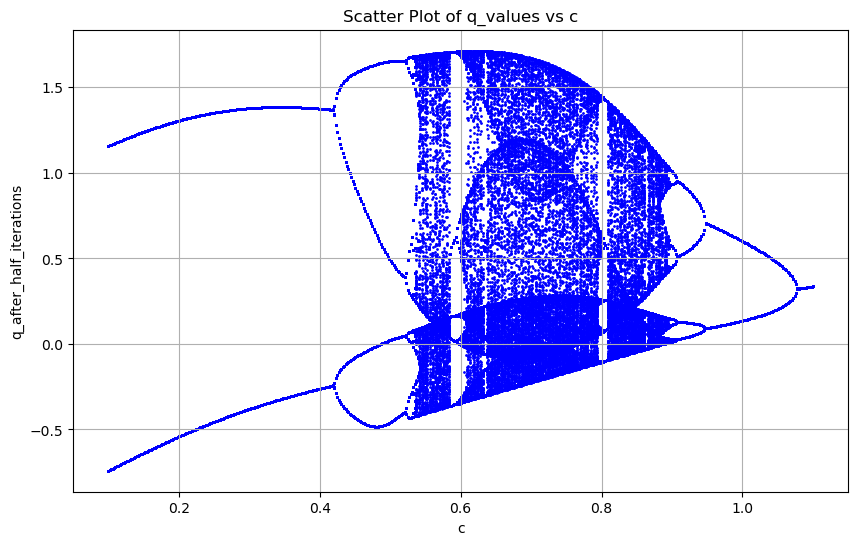

In [82]:
r,d,c,q,p,u=sp.symbols('r d c q p u')

ITERATION=1000

q_next=r/d*(c-atan(u*q))+(1-r)*q
q_next_with_params=q_next.subs({r:0.3,d:0.25,u:4.8})
q_n=sp.lambdify((q,c),q_next_with_params)

c_span=np.linspace(0.1,1.1,500)

plt.figure(figsize=(10, 6))

points = []
for c in c_span:
    q_after_half_interations=np.zeros(int(ITERATION/2))
    q_0=1
    for i in range(int(ITERATION/2)):
        q_0=q_n(q_0,c)
    for i in range(int(ITERATION/5)):
        q_0=q_n(q_0,c)
        points.append([c,q_0])
    
points_array=np.array(points)


plt.figure(figsize=(10, 6))
plt.scatter(points_array[:, 0], points_array[:, 1], color='blue', s=1)
plt.xlabel("c")
plt.ylabel("q_after_half_iterations")
plt.title("Scatter Plot of q_values vs c")
plt.grid(True)
plt.show()


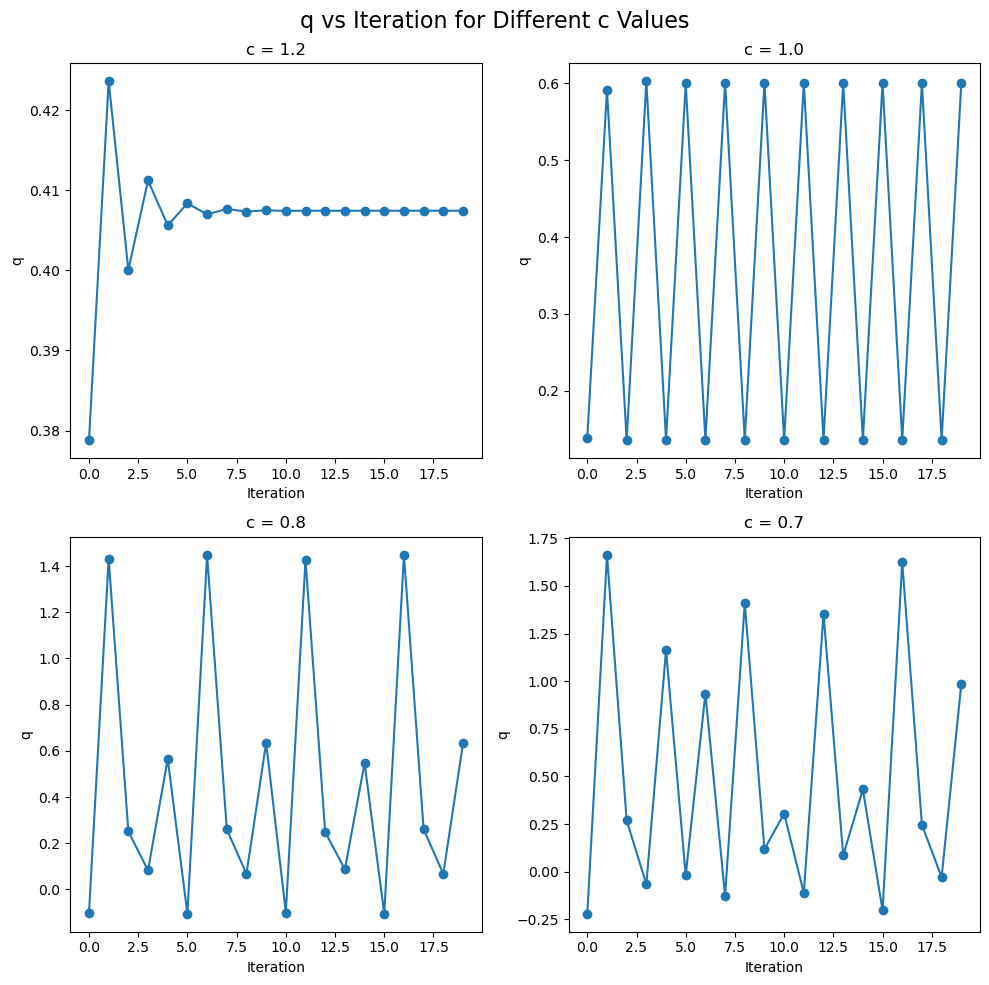

In [83]:
c_sample = [1.2, 1.0, 0.8,0.7]
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for index, c in enumerate(c_sample):
    q_list = []
    q_0 = 0.5  
    for i in range(20):
        q_0 = q_n(q_0, c)
        q_list.append(q_0)  
    axs[index // 2, index % 2].plot(range(20), q_list, marker="o", linestyle="-")
    axs[index // 2, index % 2].set_title(f"c = {c:.1f}")
    axs[index // 2, index % 2].set_xlabel("Iteration")
    axs[index // 2, index % 2].set_ylabel("q")
fig.suptitle("q vs Iteration for Different c Values", fontsize=16)
plt.tight_layout()
plt.show()

### 结果分析
- 从图1中可以观察到明显的分岔与混沌现象。
- 经过实验选择c的范围为[0,1,1.1]这时现象比较明显，c>1.1时q(t)收敛。
- c=1.1时分叉数为1，向前可以找到分叉点分别为0.95，0.91，0.90等
- 图2中选择了几个不同的c的值，观察前20个iteration的q(t)的变化
- c等于1.2时，q(t)震荡收敛
- 其余选取的c不收敛，但是出现周期性重复，体现分岔的特点

### 结论
- c=1.1时分叉数为1，向前可以找到分叉点分别为0.95，0.91，0.90等
- c等于1.2时，q(t)震荡收敛
- 观察到分岔和混沌现象
- 期望价格的变化规律如图所示。
$$ \frac{b_2-b_{1}}{b_{3}-b_2} = 3.14457 \ \frac{b_3-b_{2}}{b_{4}-b_3} = 4.23469 \ \frac{b_4-b_{3}}{b_{5}-b_4} = 4.2608\ \frac{b_5-b_{4}}{b_{6}-b_5} = 4.6000 $$
- 从上述结果可以看出，分叉数逐渐增大，且分叉数的比值逐渐趋近于一个常数，验证了Feigenbaum常数定律。
